<a href="https://colab.research.google.com/github/KacperLatecki/Zadania_ED/blob/main/brakujace_wartosci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# **Brakujące wartości**

**Brakujące wartości** to rekordy, które są nieobecne w zestawie danych.

**Przyczyny występowania**:
* Błąd człowieka podczas wprowadzania danych​

* Ochrona prywatności (dane wrażliwe)
* Brak odpowiedzi w ankietach

Problemy techniczne przy zbieraniu danych

Jest to jeden z **najczęściej występujących problemów** w analizie danych i kluczowy etap wstępnego przetwarzania (data preprocessing).

In [ ]:
# Definicja DataFrame
df_student = pd.DataFrame({
    'imie': ['Anna', 'Piotr', 'Maria', 'Jan', 'Katarzyna', 'Tomasz', 'Magdalena', 'Paweł', 'Ewa', 'Michał'],
    'wiek': [20, 22, 21, np.nan, 23, 20, 22, np.nan, 21, 23],
    'ocena_matematyka': [4.5, np.nan, 5.0, 4.0, 3.5, 4.5, 5.0, 3.5, np.nan, 4.0],
    'ocena_fizyka': [5.0, 4.5, np.nan, 4.0, 4.5, np.nan, 5.0, 4.0, 4.5, np.nan],
    'ocena_informatyka': [4.0, 3.5, 4.5, np.nan, 5.0, 3.5, 4.5, 4.0, np.nan, 4.5],
    'miasto': ['Warszawa', 'Kraków', 'Wrocław', 'Poznań', 'Gdańsk', np.nan, 'Warszawa', 'Kraków', 'Wrocław', 'Poznań']
})

In [ ]:
# 1. Sprawdzenie czy są brakujące wartości
print("1. Sprawdzenie brakujących wartości (True = brak):")
print(df_student.isnull())
# lub: df.isna()
print("\n" + "="*60 + "\n")

1. Sprawdzenie brakujących wartości (True = brak):
    imie   wiek  ocena_matematyka  ocena_fizyka  ocena_informatyka  miasto
0  False  False             False         False              False   False
1  False  False              True         False              False   False
2  False  False             False          True              False   False
3  False   True             False         False               True   False
4  False  False             False         False              False   False
5  False  False             False          True              False    True
6  False  False             False         False              False   False
7  False   True             False         False              False   False
8  False  False              True         False               True   False
9  False  False             False          True              False   False




In [ ]:
# 2. Liczba brakujących wartości w każdej kolumnie
print("2. Liczba brakujących wartości w każdej kolumnie:")
print(df_student.isna().sum())
print("\n" + "="*60 + "\n")

2. Liczba brakujących wartości w każdej kolumnie:
imie                 0
wiek                 2
ocena_matematyka     2
ocena_fizyka         3
ocena_informatyka    2
miasto               1
dtype: int64




In [ ]:
# 3. Procent brakujących wartości
print("3. Procent brakujących wartości w każdej kolumnie:")
print((df_student.isnull().sum() / len(df)) * 100)
print("\n" + "="*60 + "\n")

3. Procent brakujących wartości w każdej kolumnie:
imie                  0.0
wiek                 20.0
ocena_matematyka     20.0
ocena_fizyka         30.0
ocena_informatyka    20.0
miasto               10.0
dtype: float64




In [ ]:
# 4. Całkowita liczba brakujących wartości
print("4. Całkowita liczba brakujących wartości w całym DataFrame:")
print(df_student.isnull().sum().sum())

4. Całkowita liczba brakujących wartości w całym DataFrame:
10


## **Rozwiązanie kwestii brakujących danych**

* **Usuwanie rekordów** zawierających brakujące wartości.
* **Ręczne uzupełnianie** brakujących wartości.
* Uzupełnianie **brakujących wartości wskaźnikami** tendencji centralnej, np.: średnią, medianą czy dominantą.
  * **Średniej** używamy w przypadku cech numerycznych,
  * **mediany** w cechach porządkowych,
  * **dominantę** (czyli najczęściej powtarzającą się wartość) umieszczamy w cechach kategorialnych.

Uzupełnianie **najbardziej prawdopodobną wartością** przy użyciu modeli uczenia maszynowego, takich jak regresja, drzewa decyzyjne czy algorytm KNN.

## **Czym jest NaN i dlaczego jest wyjątkowy?**

**NaN** (Not a Number) – specjalna wartość reprezentująca brakujące dane.

Dane mogą zawierać różne oznaczenia braków:
* Tekstowe: "NA", "N/A", "brak", "?", "-"

* Numeryczne: 0, -999, -1​

* Inne: puste stringi ""


In [ ]:
np.nan == np.nan

False

In [ ]:
np.nan is np.nan

True

 Dlatego używamy specjalnych funkcji:

In [ ]:
pd.isna(np.nan)

True

In [ ]:
pd.isnull(np.nan)

True

In [ ]:
df = pd.DataFrame({
    'A': [1, np.nan, 3],# ✓ NaN - brakująca wartość ​
    'B': [4, None, 6],  # ✓ None - też brakująca ​
    'C': [7, 0, 9],     # ✗ 0 - NIE jest brakująca! ​
    'D': ['x', '', 'z'] # ✗ '' - NIE jest brakująca! ​
})

In [ ]:
df.isnull().sum()

,0
A,1
B,1
C,0
D,0


## **Usuwanie brakujących wartości**

Usuń wiersze z DOWOLNĄ brakującą wartością (domyślnie) ​

```
df.dropna()
df.dropna(how='any')
```

Usuń wiersze tylko gdy WSZYSTKIE wartości są brakujące df.dropna(how='all')
```
df.dropna(how="all")
```

Usuń kolumny z brakującymi wartościami
```
df.dropna(axis=1)
```

## **Uzupełnienie średnią lub modą​**

W pandas *dataFrame* możemy uzupełnić brakujące wartości za pomocą funkcji `fillna()`.
* Przyjmuje ona jedną wartość, która będzie wstawiana w pustych pozycjach lub zamiast wartości NaN.

Uzupełnia wszystkie brakujące wartości w kolumnie age średnią obliczoną z tejże kolumny

```data['age'] = data.age.fillna(data.age.mean())​```

Uzupełnia wszystkie brakujące wartości w kolumnie income medianą obliczoną z tejże kolumny

```data['income']=data.income.fillna(data.income.median())```

Zastępuje wszystkie brakujące wartości w kolumnie gender (kolumna kategorii) dominantą wyliczoną z tejże kolumny​

```data['gender']=data['gender'].fillna(data['gender'].mode()[0])​```


In [ ]:
df_student

,imie,wiek,ocena_matematyka,ocena_fizyka,ocena_informatyka,miasto
0,Anna,20.0,4.5,5.0,4.0,Warszawa
1,Piotr,22.0,NaN,4.5,3.5,Kraków
2,Maria,21.0,5.0,NaN,4.5,Wrocław
3,Jan,NaN,4.0,4.0,NaN,Poznań
4,Katarzyna,23.0,3.5,4.5,5.0,Gdańsk
5,Tomasz,20.0,4.5,NaN,3.5,NaN
6,Magdalena,22.0,5.0,5.0,4.5,Warszawa
7,Paweł,NaN,3.5,4.0,4.0,Kraków
8,Ewa,21.0,NaN,4.5,NaN,Wrocław
9,Michał,23.0,4.0,NaN,4.5,Poznań


In [ ]:
df_student["wiek"] = df_student.wiek.fillna(df_student.wiek.mean())
df_student

,imie,wiek,ocena_matematyka,ocena_fizyka,ocena_informatyka,miasto
0,Anna,20.0,4.5,5.0,4.0,Warszawa
1,Piotr,22.0,NaN,4.5,3.5,Kraków
2,Maria,21.0,5.0,NaN,4.5,Wrocław
3,Jan,21.5,4.0,4.0,NaN,Poznań
4,Katarzyna,23.0,3.5,4.5,5.0,Gdańsk
5,Tomasz,20.0,4.5,NaN,3.5,NaN
6,Magdalena,22.0,5.0,5.0,4.5,Warszawa
7,Paweł,21.5,3.5,4.0,4.0,Kraków
8,Ewa,21.0,NaN,4.5,NaN,Wrocław
9,Michał,23.0,4.0,NaN,4.5,Poznań


In [ ]:
df_student["ocena_matematyka"] = df_student["ocena_matematyka"] .fillna(df_student["ocena_matematyka"] .mean())
df_student

,imie,wiek,ocena_matematyka,ocena_fizyka,ocena_informatyka,miasto
0,Anna,20.0,4.50,5.0,4.0,Warszawa
1,Piotr,22.0,4.25,4.5,3.5,Kraków
2,Maria,21.0,5.00,NaN,4.5,Wrocław
3,Jan,21.5,4.00,4.0,NaN,Poznań
4,Katarzyna,23.0,3.50,4.5,5.0,Gdańsk
5,Tomasz,20.0,4.50,NaN,3.5,NaN
6,Magdalena,22.0,5.00,5.0,4.5,Warszawa
7,Paweł,21.5,3.50,4.0,4.0,Kraków
8,Ewa,21.0,4.25,4.5,NaN,Wrocław
9,Michał,23.0,4.00,NaN,4.5,Poznań


In [ ]:
df_student["miasto"] = df_student["miasto"].fillna(df_student["miasto"] .mode()[0])
df_student

,imie,wiek,ocena_matematyka,ocena_fizyka,ocena_informatyka,miasto
0,Anna,20.0,4.50,5.0,4.0,Warszawa
1,Piotr,22.0,4.25,4.5,3.5,Kraków
2,Maria,21.0,5.00,NaN,4.5,Wrocław
3,Jan,21.5,4.00,4.0,NaN,Poznań
4,Katarzyna,23.0,3.50,4.5,5.0,Gdańsk
5,Tomasz,20.0,4.50,NaN,3.5,Kraków
6,Magdalena,22.0,5.00,5.0,4.5,Warszawa
7,Paweł,21.5,3.50,4.0,4.0,Kraków
8,Ewa,21.0,4.25,4.5,NaN,Wrocław
9,Michał,23.0,4.00,NaN,4.5,Poznań


## **Obsługa brakujących danych jako stringi**

**Problem**
* Dane często zawierają braki zapisane jako tekst: **"NA", "N/A", "brak", "?", "-", "brak danych"**

* Pandas **nie rozpoznaje** ich automatycznie jako brakujące wartości!


### **Rozwiązanie 1: Wczytywanie z pliku CSV**

```
import pandas as pd

# Definiujemy listę wartości oznaczających brak
braki = ['NA', 'N/A', 'brak', 'brak danych', '?', '-', '']

# Wczytujemy plik z parametrem na_values
df = pd.read_csv('dane.csv', na_values=braki)

```

### **Rozwiązanie 2: Zamiana po wczytaniu**

```
# Zamieniamy wybrane stringi na NaN
df.replace(['NA', 'N/A', 'brak', 'brak danych', '?', '-'], np.nan, inplace=True)

# LUB dla konkretnej kolumny
df['kolumna'] = df['kolumna'].replace('brak', np.nan)
```



# **Zadanie**:

**Dane**: Plik *nieruchomosci.csv* - 45 ofert sprzedaży mieszkań

**Polecenie**

* Wczytaj dane i przeanalizuj problem brakujących wartości

* Zdecyduj, jak poradzić sobie z brakami w poszczególnych kolumnach

* Uzasadnij swoje wybory i zaimplementuj rozwiązanie

**Do przemyślenia**

* Jakie typy zmiennych masz w danych?
* Czy wszystkie braki powinny być obsłużone tak samo?
* Jakie konsekwencje niesie każda metoda?
* Jak to wpływa na eksploracyjną analizę danych?


   id    miasto  dzielnica powierzchnia  liczba_pokoi rok_budowy pietro  \
0   1  Warszawa    Mokotów           65             3       2015      4   
1   2    Kraków  Krowodrza           48             2        NaN      2   
2   3   Wrocław     Krzyki           72             3       2010   brak   
3   4    Poznań   Grunwald           55             2       2018      3   
4   5    Gdańsk   Wrzeszcz           80             4       1998      1   

   liczba_pieter parking balkon          stan  cena_m2  cena_total  
0             10     Tak    Tak         Dobry    12500      812500  
1              5     Nie    Tak            很好    10200      489600  
2              4     Tak    Nie         Dobry     9800      705600  
3              8     Tak    Tak  Bardzo dobry    11000      605000  
4              3       ?    Tak    Do remontu     8500      680000  
Braki w kolumnach:
id               0
miasto           0
dzielnica        0
powierzchnia     4
liczba_pokoi     0
rok_budowy       4
pi

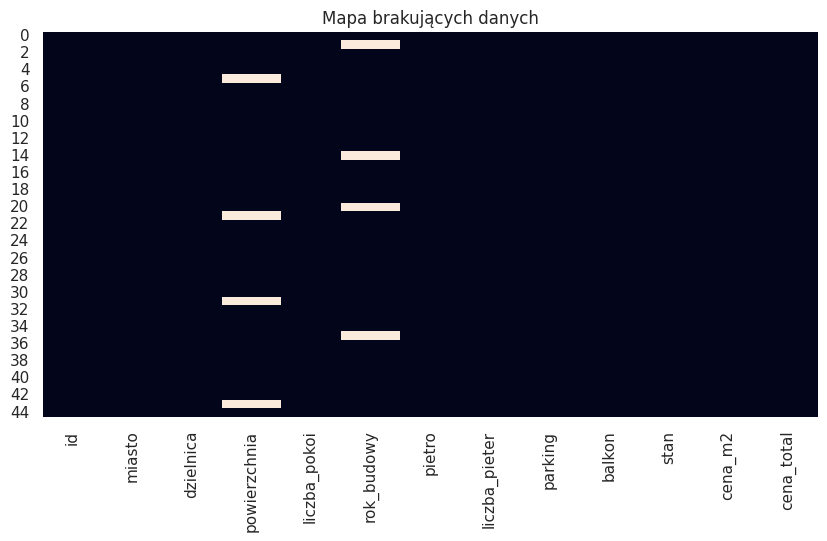

Braki po uzupełnieniu:
id               0
miasto           0
dzielnica        0
powierzchnia     0
liczba_pokoi     0
rok_budowy       0
pietro           0
liczba_pieter    0
parking          0
balkon           0
stan             0
cena_m2          0
cena_total       0
dtype: int64


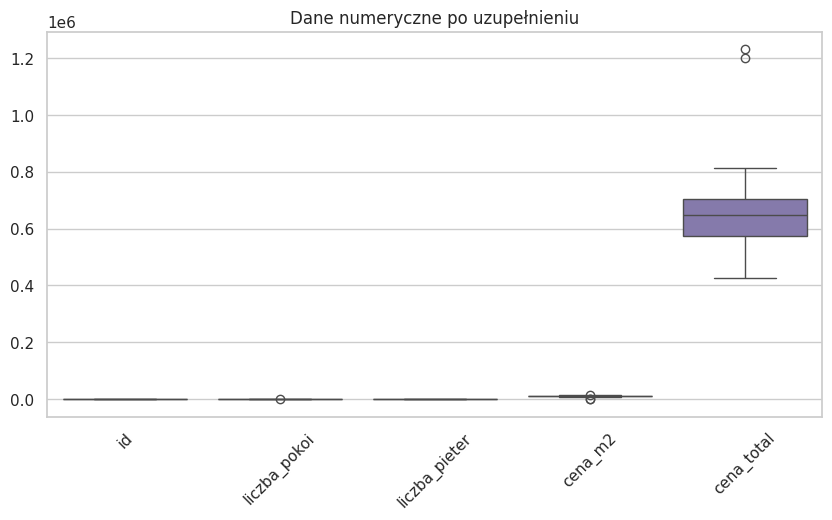

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# ================================
# 1. Wczytanie danych
# ================================
df = pd.read_csv("nieruchomosci.csv")
print(df.head())

# ================================
# 2. Sprawdzenie braków
# ================================

print("Braki w kolumnach:")
print(df.isnull().sum())

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Mapa brakujących danych")
plt.show()

# ================================
# 3. Uzupełnianie brakujących wartości
# ================================

df_filled = df.copy()

for col in df_filled.columns:
    if df_filled[col].dtype in ['float64', 'int64']:
        df_filled[col] = df_filled[col].fillna(df_filled[col].mean())
    else:
        df_filled[col] = df_filled[col].fillna(df_filled[col].mode()[0])

print("Braki po uzupełnieniu:")
print(df_filled.isnull().sum())

# ================================
# 4. Wizualizacja porównawcza
# ================================

plt.figure(figsize=(10,5))
sns.boxplot(data=df_filled.select_dtypes(include=['float64','int64']))
plt.title("Dane numeryczne po uzupełnieniu")
plt.xticks(rotation=45)
plt.show()

# ================================
# 5. Zapis oczyszczonego pliku
# ================================
df_filled.to_csv("nieruchomosci_clean.csv", index=False)
